In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os.path as osp
import cv2

import numpy as np


Bad key "text.kerning_factor" on line 4 in
/Users/rajat/anaconda3/envs/ml/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
label_file = 'data/labels.csv'

In [3]:
df_labels = pd.read_csv(label_file)

In [4]:
df_labels.head()

,Id,Directory,File,Complete,Wrinkeled,Cut,Bounce,Hole,Internal Rotting,Sun burn,Broken stamp,Ears,Aphids,Trip
0,4,TripA01,20201019-173127.303.tiff,True,False,False,False,False,False,False,False,False,False,True
1,5,TripA01,20201019-173127.361.tiff,True,False,False,False,False,False,False,False,False,False,True
2,6,TripA01,20201019-173127.419.tiff,True,False,False,False,False,False,False,False,False,False,True
3,7,TripA01,20201019-173127.472.tiff,True,False,False,False,False,False,False,False,False,False,True
4,9,TripA01,20201019-173130.047.tiff,True,False,False,False,False,False,False,False,False,False,True


In [23]:
df_labels.columns

Index(['Id', 'Directory', 'File', 'Complete', 'Wrinkeled', 'Cut', 'Bounce',
       'Hole', 'Internal Rotting', 'Sun burn', 'Broken stamp', 'Ears',
       'Aphids', 'Trip'],
      dtype='object')

In [10]:
i=10
filename = osp.join('data', df_labels['Directory'][i], df_labels['File'][i])

In [11]:
filename

'data/TripA01/20201019-173138.785.tiff'

In [12]:
im=cv2.imread(filename, -1) 
imin, imax = np.min(im), np.max(im)
im -= imin
imf = np.array(im,'float32')
imf *= 1./(imax-imin)

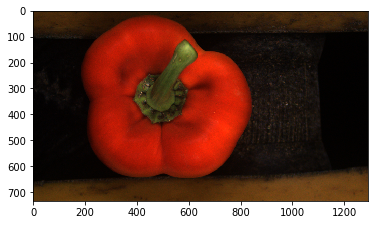

In [13]:
plt.imshow(imf[:,:,[2,1,0]]) # Had to permute the last

In [22]:
df_labels.iloc[:, 3:].sum(axis=0)

Complete            320
Wrinkeled             0
Cut                  10
Bounce                0
Hole                  0
Internal Rotting      0
Sun burn              0
Broken stamp         40
Ears                  0
Aphids                0
Trip                246
dtype: int64

In [25]:
df_labels['Trip'][0].astype('float')

1.0